In [ ]:
# required packages & models
import os
import sys
import pickle
import warnings
warnings.filterwarnings('ignore')
import csv
import sklearn
import shap
import xgboost
import lightgbm as lgb
from sklearn import *
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree._classes import DecisionTreeClassifier
#import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import pandas as pd
from termcolor import colored as cl #text customization
shap.initjs() # load JS visualization code to notebook. SHAP plots won't be displayed without this

#Note: shap explanations are usually done after training a model, not so much of training cv partitions
# Would it be best to implement directly from ModelJob.py and ModelMain.py or implement shap on CV partitions for each model?
# can we even implemeny shap on cv partitions? would it affect interpretation of the values


Steps:

* Unpickle trained model and import best params csv file (?)
* import hcc-data_example_CV_0_train and hcc-data_example_CV_0_test files
* create method to prep data and figure out how to use the training and testing variables 'x' for shapley values
* run datasets through fitted model
* use model and x-variables (both train and test) to create shapley values for given model
* display shap values using visualization (separate)
 
 
 
* figure out which algs were trained so we can decide on the 'best' explainer depending on alg (tree? linear? gradient? are xgboost, catboost, lightgbm both tree & gradient) --> consider if-then loop to decide on model & explainer

* 

In [2]:
# Part 1: Unpickle models
#          Create a function that loads all pickled files for each ML algorithm


# setting run parameters
# pathways must be adjusted according to user's local directory
experiment_path = "/Users/jessicakim/Desktop/STREAMLINE/DemoData/Output/hcc_demo/"
rep_data_path = '/Users/jessicakim/Desktop/STREAMLINE/DemoRepData/hcc-data_example_rep.csv' # path to replication dataset
print('\n')



In [ ]:
jupyterRun = 'True'
# Loading necessary variables specified earlier in the pipeline from metadatafor dataPrep()
file = open(experiment_path + "metadata.pickle", 'rb')
metadata = pickle.load(file)
# file.close()
# print(metadata)

class_label = metadata['Class Label']
instance_label = metadata['Instance Label']
cv_partitions = int(metadata['CV Partitions'])



# Loading replication dataset from (should this be the hcc-data_example_rep.csv before after scalingInfo()?)
# Grab and order replication data columns to match training data columns
# repData = pd.read_csv(rep_data_path) # Note: loadData method found in ExploratoryAnalysisJob.py


algorithms = []
trained_models_list = []

# Function will loop through to unpickle trained models taken from ModelJob.py and CV partitions 
# FIXME: make it so that the function can loop through all  pickled files in pickled_metrics (continue to adjust)
def load_trained_models():
    
    alg_file = open(experiment_path + '/' + "algInfo.pickle", 'rb')
    algInfo = pickle.load(alg_file)
    alg_file.close()

    abbrev = {}
    for cvCount in range(0,cv_partitions):
        for key in algInfo:
            if algInfo[key][0]: # If that algorithm was used
                algorithms.append(key)
                abbrev[key] = (algInfo[key][1])
                trained_models_file = experiment_path + '/hcc-data_example/models/pickledModels/'+ abbrev[key] + "_" + str(cvCount)+ '.pickle'
                file = open(trained_models_file, 'rb')
                trained_models = pickle.load(file)
                trained_models_list.append(trained_models)
                file.close()
                # print method will be optional, can be uncommented to double check models that were trained
#                 print('CV{}: {}\n'.format(cvCount, trained_models))
    
    
           
    

# testing method
print('\n')
clf = load_trained_models()
for item in range(0,len(trained_models_list)):
        print('{} : \n {}'.format(item, trained_models_list[item]))
        print(type(trained_models_list[item]))
        

for used_alg in range(0,len(algorithms)):
    print(algorithms[used_alg])
    print(type(algorithms[used_alg]))

# Part 2: Load and read csv datasets to try out trained models with SHAP 

          0         1         2         3         4         5         6   \
0   0.036900  1.055129 -0.585210 -0.143022  1.272418 -0.641236 -0.521876   
1  -0.332366 -0.271973  3.887411 -0.142592  1.272418 -0.641236 -0.894012   
2  -0.097379  0.317850  0.197499 -0.133145 -0.785905 -0.641236 -0.442938   
3  -0.433074  0.730726 -0.484576 -0.143009 -0.785905 -0.641236 -0.533153   
4  -0.735201 -0.419428 -0.288899 -0.143010 -0.785905  0.769484 -0.465492   
5  -0.684846  0.170395 -0.389533 -0.142973 -0.785905 -0.641236 -0.815074   
6  -0.130948  0.612761  0.616807 -0.142846 -0.785905 -0.641236 -0.499322   
7  -0.869479  1.350040 -0.266536 -0.142986  1.272418 -0.641236 -0.848905   
8  -0.550568  1.202584 -0.551665 -0.135894  1.272418 -0.641236 -0.149740   
9  -0.718416  0.022939 -0.965383 -0.143021  1.272418  0.769484 -0.747413   
10 -0.063809  0.317850 -0.199446 -0.141651  1.272418 -0.641236  0.380273   
11  0.607582  1.055129 -0.797659 -0.143020  1.272418 -0.641236 -0.273785   
12 -0.550568

SHAP summary for Linear Models in Iteration0: 



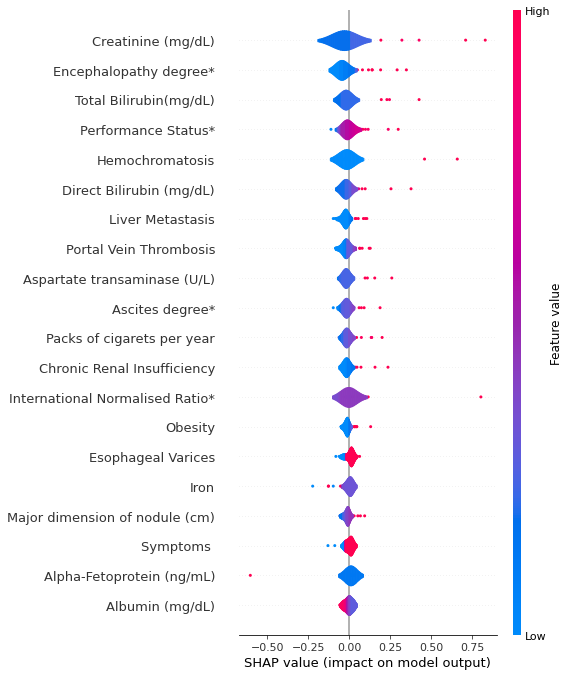

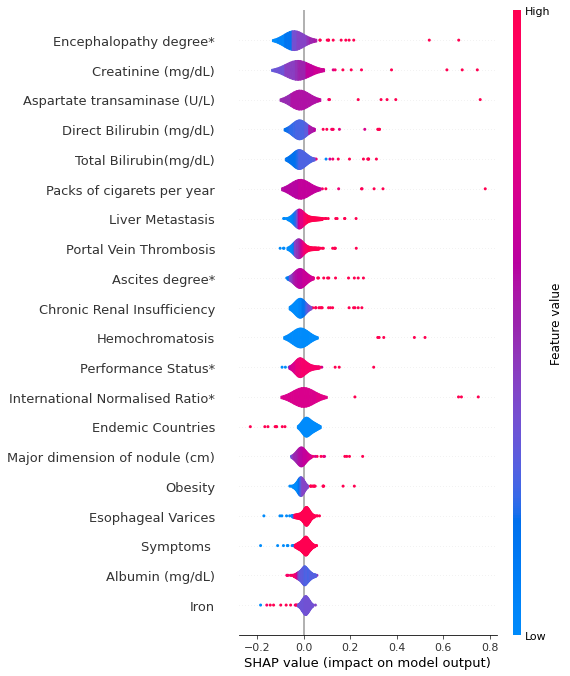

          0         1         2         3         4         5         6   \
0   0.036900  1.055129 -0.585210 -0.143022  1.272418 -0.641236 -0.521876   
1  -0.332366 -0.271973  3.887411 -0.142592  1.272418 -0.641236 -0.894012   
2  -0.097379  0.317850  0.197499 -0.133145 -0.785905 -0.641236 -0.442938   
3  -0.433074  0.730726 -0.484576 -0.143009 -0.785905 -0.641236 -0.533153   
4  -0.735201 -0.419428 -0.288899 -0.143010 -0.785905  0.769484 -0.465492   
5  -0.684846  0.170395 -0.389533 -0.142973 -0.785905 -0.641236 -0.815074   
6  -0.130948  0.612761  0.616807 -0.142846 -0.785905 -0.641236 -0.499322   
7  -0.869479  1.350040 -0.266536 -0.142986  1.272418 -0.641236 -0.848905   
8  -0.550568  1.202584 -0.551665 -0.135894  1.272418 -0.641236 -0.149740   
9  -0.718416  0.022939 -0.965383 -0.143021  1.272418  0.769484 -0.747413   
10 -0.063809  0.317850 -0.199446 -0.141651  1.272418 -0.641236  0.380273   
11  0.607582  1.055129 -0.797659 -0.143020  1.272418 -0.641236 -0.273785   
12 -0.550568

SHAP summary for Linear Models in Iteration1: 



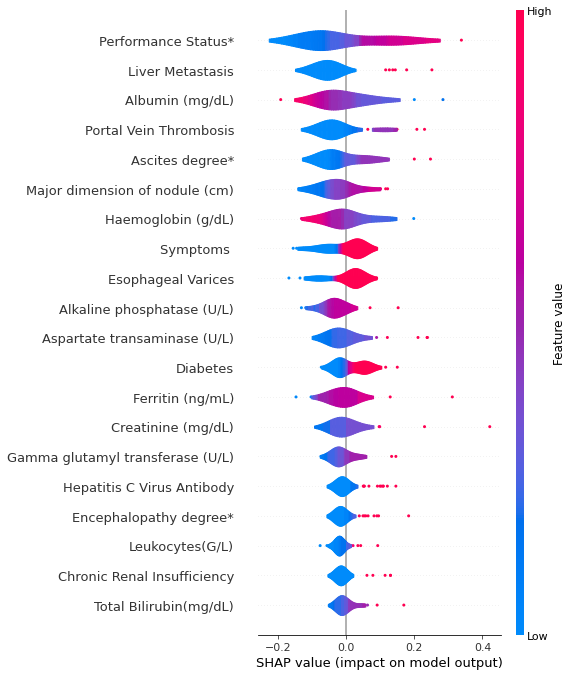

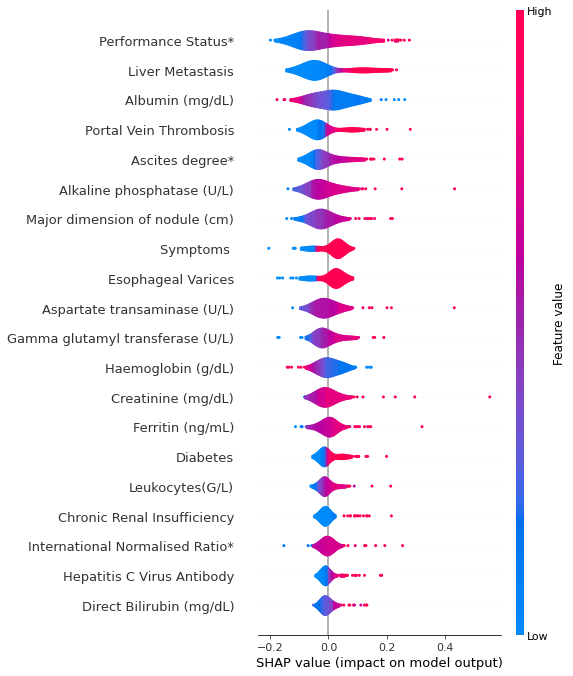

          0         1         2         3         4         5         6   \
0   0.036900  1.055129 -0.585210 -0.143022  1.272418 -0.641236 -0.521876   
1  -0.332366 -0.271973  3.887411 -0.142592  1.272418 -0.641236 -0.894012   
2  -0.097379  0.317850  0.197499 -0.133145 -0.785905 -0.641236 -0.442938   
3  -0.433074  0.730726 -0.484576 -0.143009 -0.785905 -0.641236 -0.533153   
4  -0.735201 -0.419428 -0.288899 -0.143010 -0.785905  0.769484 -0.465492   
5  -0.684846  0.170395 -0.389533 -0.142973 -0.785905 -0.641236 -0.815074   
6  -0.130948  0.612761  0.616807 -0.142846 -0.785905 -0.641236 -0.499322   
7  -0.869479  1.350040 -0.266536 -0.142986  1.272418 -0.641236 -0.848905   
8  -0.550568  1.202584 -0.551665 -0.135894  1.272418 -0.641236 -0.149740   
9  -0.718416  0.022939 -0.965383 -0.143021  1.272418  0.769484 -0.747413   
10 -0.063809  0.317850 -0.199446 -0.141651  1.272418 -0.641236  0.380273   
11  0.607582  1.055129 -0.797659 -0.143020  1.272418 -0.641236 -0.273785   
12 -0.550568

SHAP summary for Tree Models in Iteration2: 



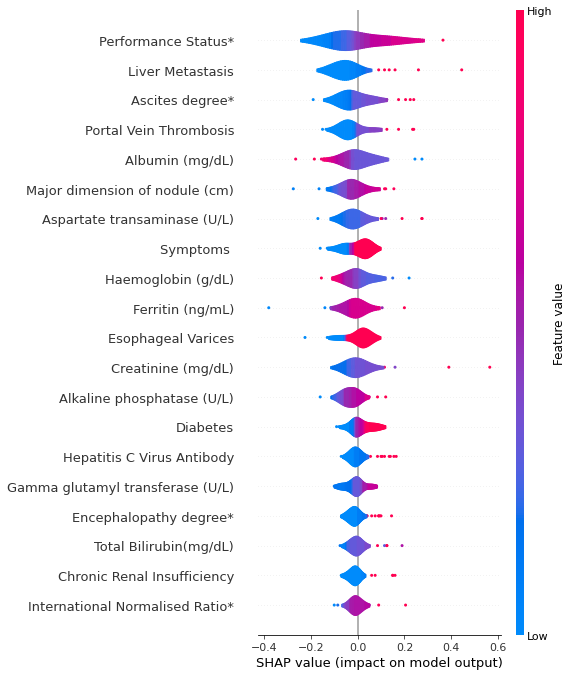

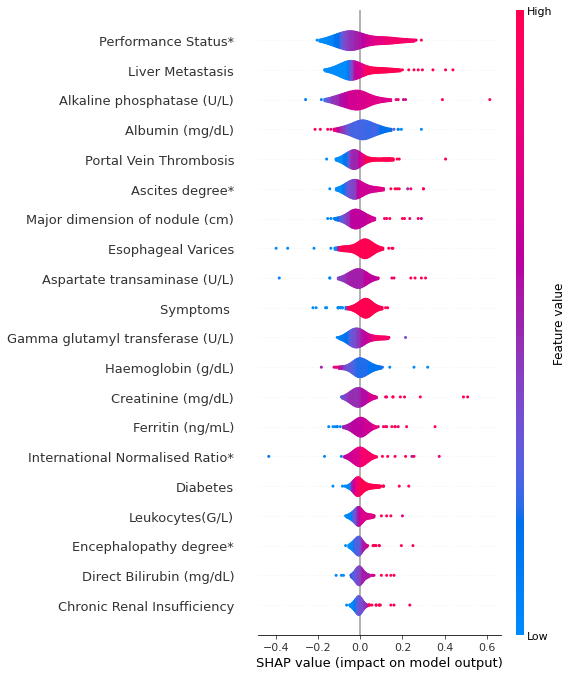

          0         1         2         3         4          5         6   \
0  -0.717855 -0.331786  1.901814  0.626422  2.723994  -0.178954 -0.703975   
1   0.954496 -0.938934  0.044895 -1.596367 -0.519029  -0.196350 -0.703975   
2   0.590942 -0.216921 -0.558604  0.626422  0.932304   0.786948 -0.703975   
3   0.736363 -0.676384 -0.109849  0.626422 -0.371327  -0.195601  2.164072   
4   0.227387 -0.233330  1.654225  0.626422 -0.589669  -0.196098 -0.703975   
5   0.518231  0.226133 -0.419335 -1.596367 -0.634622  -0.192802 -0.703975   
6   0.518231  0.012811 -1.657281  0.626422  0.193794  -0.194984 -0.703975   
7   0.081965 -0.709202  1.437584  0.626422 -0.840120  -0.194984 -0.703975   
8  -1.154121 -0.102055  0.044895  0.626422  0.392871  -0.173287 -0.703975   
9  -1.372254 -0.512290 -0.574078 -1.596367  2.004749  -0.196295 -0.703975   
10 -0.935988 -0.413833 -1.347795  0.626422 -0.750215  -0.188226 -0.703975   
11  0.954496 -0.167693 -0.264592  0.626422 -0.615356  -0.196269  0.730048   

ValueError: X has 41 features, but GaussianNB is expecting 39 features as input.

In [414]:



# file paths are temporary for testing the code
# FIXME: change file paths so that we are loading hcc-data_example_rep.csv datasets
train_file_path = '/Users/jessicakim/Desktop/STREAMLINE/DemoData/Output/hcc_demo/hcc-data_example/CVDatasets'
test_file_path = '/Users/jessicakim/Desktop/STREAMLINE/DemoData/Output/hcc_demo/hcc-data_example/CVDatasets'



# FIXME: load feature names from csv files, check ApplyModelJob.py for reference
# FIXME: make a for-loop that loops through all CV testing datasets frm hcc-data_example
# FIXME: import feature names from previous phase (might just have to be separate method or by itself)
x_feature_names = []
y_feature_name = []

temp_trainX = []
temp_testX = []
def dataPrep(train_file_path,instance_label,class_label, test_file_path):
    """ Loads target cv training dataset, separates class from features and removes instance labels."""
    for cvCount in range(0,cv_partitions):
        for count in range(0,len(trained_models_list)):
         
            train = pd.read_csv(train_file_path + '/hcc-data_example_CV_' + str(cvCount) + '_Train.csv')
            if instance_label != 'None':
                train = train.drop(instance_label,axis=1)
            trainX = pd.DataFrame(train.drop(class_label,axis=1).values) # solution to array structure? DataFrame?
            # is it looping through each CV_train all at once? ... maybe
            temp_trainX.append(trainX.copy())
            trainY = pd.DataFrame(train[class_label].values)

            # append x and y feature names for SHAP plots before train-variable is deleted to clean up memory
            x_names = train.drop(class_label,axis=1).columns.tolist()
            x_feature_names.append(x_names)
            y_name = class_label
            y_feature_name.append(y_name)

            del train #memory cleanup
            test = pd.read_csv(test_file_path + '/hcc-data_example_CV_' + str(cvCount) + '_Test.csv')
            if instance_label != 'None':
                test = test.drop(instance_label,axis=1)
            testX = pd.DataFrame(test.drop(class_label,axis=1).values)
            temp_testX.append(testX.copy())
            testY = pd.DataFrame(test[class_label].values)
            del test #memory cleanup
    #         adjusting DataFrame size, checking if columns match between training and testing set
    #         if trainX.columns[cvCount] != testX.columns[cvCount]:
    #             trainX.drop([trainX.columns[cvCount]], axis=1)
    #             testX.drop([testX.columns[cvCount]], axis=1)
            print(testX)
#             print(trained_models_list[cvCount])
#             break

            
#                 for count in range(0,len(algorithms)):
#                     print('testX values: \n', testX)
            if algorithms[count] in ['Naive Bayes', 'Logistic Regression']:
                model = trained_models_list[count]  #load trained model as an object variable
                print('Model type: {}'.format(type(model))) #calls type to make sure the actual trained model is being loaded
                                    #                 if len(testX.columns) > 39:   # not quite right
                                    #                     testX.drop(testX.columns[[count]], axis=1, inPlace='True')  # https://www.machinelearningplus.com/pandas/pandas-drop-column-using-dataframe-drop/
                max_evals = max(500, (2 * len(testX)) + 1) # number of permutations
                explainer = shap.Explainer(model.predict, trainX) # explainer object is trained using training dataset
                shap_test = explainer(testX, max_evals=max_evals) #this explainer uses test data to create values
                shap_train = explainer(trainX, max_evals=max_evals) #this explainer uses train data to crete values
                print('SHAP summary for Linear Models in Iteration{}: \n'.format(count))
                summary_shap_test = shap.summary_plot(shap_test, testX, x_feature_names[cvCount], plot_type='violin')
                summary_shap_train = shap.summary_plot(shap_train, trainX, x_feature_names[cvCount], plot_type='violin')



            elif algorithms[count] in ["Xgboost","Decision Tree","Random Forest","LightGBM","CatBoost"]:
                max_evals = (2 * len(testX)) + 1
                tree_model = trained_models_list[count]
                print('Model type: {}'.format(type(tree_model)))
                tree_explainer = shap.Explainer(tree_model, trainX) # FIXME: find a way to correspond model and name
                shap_test = explainer(testX, max_evals=max_evals) #this explainer uses test data to create values
                shap_train = explainer(trainX, max_evals=max_evals) #this explainer uses train data to crete values
                print('SHAP summary for Tree Models in Iteration{}: \n'.format(count))
                summary_shap_test = shap.summary_plot(shap_test, testX, x_feature_names[cvCount], plot_type='violin')
                summary_shap_train = shap.summary_plot(shap_train, trainX, x_feature_names[cvCount], plot_type='violin')
                    
                break
            count+=1
            

                    
#     # # #             return lr_shap_summary

#                     elif algorithms[count] == 'Decision Tree':
#                         dt = trained_models_list[count]
#                         print(dt)
#                         max_evals = (2 * len(testX)) + 1
#                         tree_explainer = shap.TreeExplainer(dt)
#                         expected_value = tree_explainer.expected_value
#                         dt_shap = tree_explainer(testX)
#                         print('SHAP summary for Decision Tree in Round{}: \n'.format(count))
#                         dt_shap_summary = shap.summary_plot(dt_shap, testX, x_feature_names[model], plot_type='bar')
#             #             return dt_shap_summary


#         #sanity check, making sure each cv partition is loaded
#         print('CV{} dataset: \ntrainX values: \n{}\n\ntrainY values: \n{}\n\ntestX values: \n{}\n\ntestY values: \n{}\n'.format(cvCount,trainX,trainY,testX,testY))
    
#     return trainX, trainY, testX, testY # probably dont do this


prep = dataPrep(train_file_path, instance_label, class_label, test_file_path)

# The question is, how do I know if I'm looping through all 3 sets of testX values as well as trainX values? 
# we know that all three sets(one from each partition) isn't in completely stored till after the loop finishes
# 
        
        





Progress Update July 22, 2022 : Can loop through first set of model that were trained for CV0, need to work on incrementing to next set that was trained for CV1

Once I'm able to loop through all sets (9 indivdually trained models), then focus on modularity (breaking up tasks into methods)

# Step 3: Implement SHAP to generate Shapley values and visualizations 


explainer should be trained on training data
shap values should use test data
shapley values method should account for specific models like TreeExplainer for RandomForest and DecisionTree
should we use GradientExplainer for XGB, LGBM, CatBoost, etc or can some of those models be considered a tree ensemble


In [ ]:
#Testing cell

# print('\n')
# print('Checking feature name(s) for x: \n', x_feature_names)
# print('\n')
# print('Checking feature name(s) for y: \n', y_feature_name)



In [389]:
# def get_shapExplainer(algorithm, trainX, testX):

#         explainer = None
#         if algorithms in ["Xgboost","Decision Tree","Random Forest","LightGBM","CatBoost"]:
#             explainer = shap.TreeExplainer(algorithms.model)
#         if algorithms in ["Naive Bayes", "Logistic Regression"]:
#             model.predict
#             explainer = shap.Explainer(algorithms.model, trainX)

#         return explainer 